# CONVOLUTIONAL NEURAL NETWORK FRUITS

## 1 Abstract:

In questo progetto è stata realizzata una rete neurale convoluzionale CNN da zero per risolvere un problema di classificazione dei vari tipi di frutta e verdura dal dataset Fruits-360 di Kaggle.
Il dataset contiene 206 diverse tipologie di frutta e verdura, contenente immagini da diverse angolazioni su sfondo bianco.
La rete CNN è stata sviluppata utilizzando un architettura contenente tre strati di layer Convolution2D, ognuno con un numero di filtri sempre maggiore per rilevare dettagli sempre più precisi, sono stati ultimati usando tecniche di padding e maxpooling,successivamente è stato introdotto uno strato dense, un livello di dropout per evitare l'overfitting durante l' addestramento ed infine un  layer dense per le predizioni.
Sono stati eseguiti diversi studi sui valori degli iperparametri fondamentali, ovvero il learning rate e il valore del DropOut, mostrando perchè la scelta effettuata è la più efficiente. 
Il modello prodotto è un' alternativa ai classici modelli utilizzati per questa tipologia di dataset, riportando alti livelli di precisione, come un accuratezza del 97% sul dataset di validazione.

## 2 Structure:

### 2.1 DataSet:

Per eseguire l' addestramento e la valutazione del modello prodotto è stato utilizzato il dataset Fruits 360 di Kaggle[1].
Sono state utilizzate tutte le 206 classi appartenenti al dataset.
Le immagini contengono varie tipologie di frutta e verdura in dimensione 100x100 pixel, fotografate con diverse angolazioni e con una luce controllata, tutte eseguite su sfondo bianco opaco.
Questa caratteristica permette alla rete di apprendere molto bene le varie caratteristiche delle immagini, in quanto avendo sempre lo stesso sfondo i parametri vengono otimizzati più rapidamente, semplificando il processo di apprendimento del modello.
Inoltre avendo l' immagine centrata, permette a determinati parametri di ottimizzarsi per concentrarsi sull' identificazione del frutto.

### 2.2 Data Preparation:

Le immagini sono state suddivise in batches di dimensione 30 grazie ad un generatore, utilizzando un processo chiamato lazy loading, ovvero le immagini vengono caricate un batch alla volta per non appesantire la RAM durante il training del modello.
Prima dell' addestramento i dati sono stati normalizzati rispetto al valore massimo d'intensità di ogni pixel, ovvero $2^8-1$ ,per permettere un' addestramento più efficiente del modello ed evitare divergenze nel processo di training.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

n=10 #number of epochs
datatrain="data/Training"
datatest="data/Test"
img=(100,100)
batches=30 #number of baches of training dataset
tf.keras.utils.set_random_seed(10) #set seed value for reproducibility
    
train_dataset = tf.keras.utils.image_dataset_from_directory( #makes the computation weight lighter
    datatrain,
    label_mode='categorical',
    image_size=img,
    batch_size=batches
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    datatest,
    label_mode='categorical',
    image_size=img,
    batch_size=batches
)

### 2.3 CNN Structure:

**aggiungere la descrizione e le formule della convoluzione**
La rete convoluzionale accetta in input un tensore di dimensione 100x100x3, ovvero le dimensioni delle immagini del dataset, seguite da 3 hidden layers convoluzionali con 16,32 e 64 filtri.
In ognuno di essi è stata utilizzata la funzione di attivazione Relu,perchè **da completare**.
È stato utilizzato il padding per mantenere le dimensioni delle immagini costanti dopo l'utilizzo dei filtri.
Successivamente ad ogni strato convoluzionale è viene eseguito un operazione di maxpooling di dimensione 2x2, esso prende una matrice 2x2 dei dati in input e ne sceglie il valore più alto, riducendo di 4 volte la dimensione dell' immagine in input, rendendo più leggera l'immagine ed aumentandone l' astrattezza per evitare problemi di traslazione della figura.
Infine il tensore rappresentante l'immagine finale viene srotolato in un unico vettore grazie all'operazione Flatten.
Dopodichè vi è uno strato Dence di dimensione 64, sempre con Relu come funzione di attivazione, seguito da un livello di DropOut pari a 0.1, esso è stato introdotto per rallentare l' apprendimento iniziale, riducendo l' overfitting. 
Esso spegne il 10% degli output del layer precedente.
Infine vi è un livello Dence di dimensione pari al numero delle classi da predirre, ovvero 206, esso utilizza la funzione di attivazione softmax, la migliore per restituire la distribuzione di probabilità che l' immagine scelta sia o meno un determinato frutto.
La struttura della rete è stata implementata utilizzando le librerie Keras[2] di TensorFlow[3].
**inserire l' immagine dell'idea dietro le CNN** 

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(100,100,3)),
tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(units=64, activation='relu'),
tf.keras.layers.Dropout(0.1), 
tf.keras.layers.Dense(units=206, activation='softmax')])

2025-08-23 23:12:18.835840: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-23 23:12:19.048481: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-23 23:12:21.751841: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-23 23:12:21.766366: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-23 23:12:25.521742: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

structure='cnn_struct.png'
    
plot_model(
    model,
    to_file=structure,
    show_shapes=True, # show layers dimensions
    show_layer_names=True, # show layers name
    show_layer_activations=True, # show activation function
    dpi=96 # imagine resolution
)
display(Image(filename=structure))  # to show in notebook

**spiegare le scelte fatte**

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(
    train_dataset,
    epochs=n,
    validation_data=test_dataset
)

Epoch 1/10
3467/3467 [==============================] - 519s 148ms/step - loss: 1.0621 - accuracy: 0.7115 - val_loss: 0.3012 - val_accuracy: 0.9286
Epoch 2/10
3467/3467 [==============================] - 469s 135ms/step - loss: 0.3080 - accuracy: 0.8986 - val_loss: 0.2421 - val_accuracy: 0.9428
Epoch 3/10
3467/3467 [==============================] - 468s 135ms/step - loss: 0.2182 - accuracy: 0.9285 - val_loss: 0.1875 - val_accuracy: 0.9591
Epoch 4/10
3467/3467 [==============================] - 436s 126ms/step - loss: 0.1636 - accuracy: 0.9470 - val_loss: 0.1751 - val_accuracy: 0.9601
Epoch 5/10
3467/3467 [==============================] - 425s 122ms/step - loss: 0.1298 - accuracy: 0.9573 - val_loss: 0.1810 - val_accuracy: 0.9659
Epoch 6/10
3467/3467 [==============================] - 434s 125ms/step - loss: 0.1091 - accuracy: 0.9649 - val_loss: 0.1608 - val_accuracy: 0.9687
Epoch 7/10
3467/3467 [==============================] - 447s 129ms/step - loss: 0.0898 - accuracy: 0.9706 - val_

Qui di seguito viene riportata la descrizione degli iperparametri della rete. 
Essa è costituita da 626862 parametri addestrabili, dove il 94% di essi è racchiuso nel layer Dense, questo a causa del parameter sharing **spiegare bene cos'è**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)       

## 3 Data Analisys:

### 3.1 Loss & Accuracy:

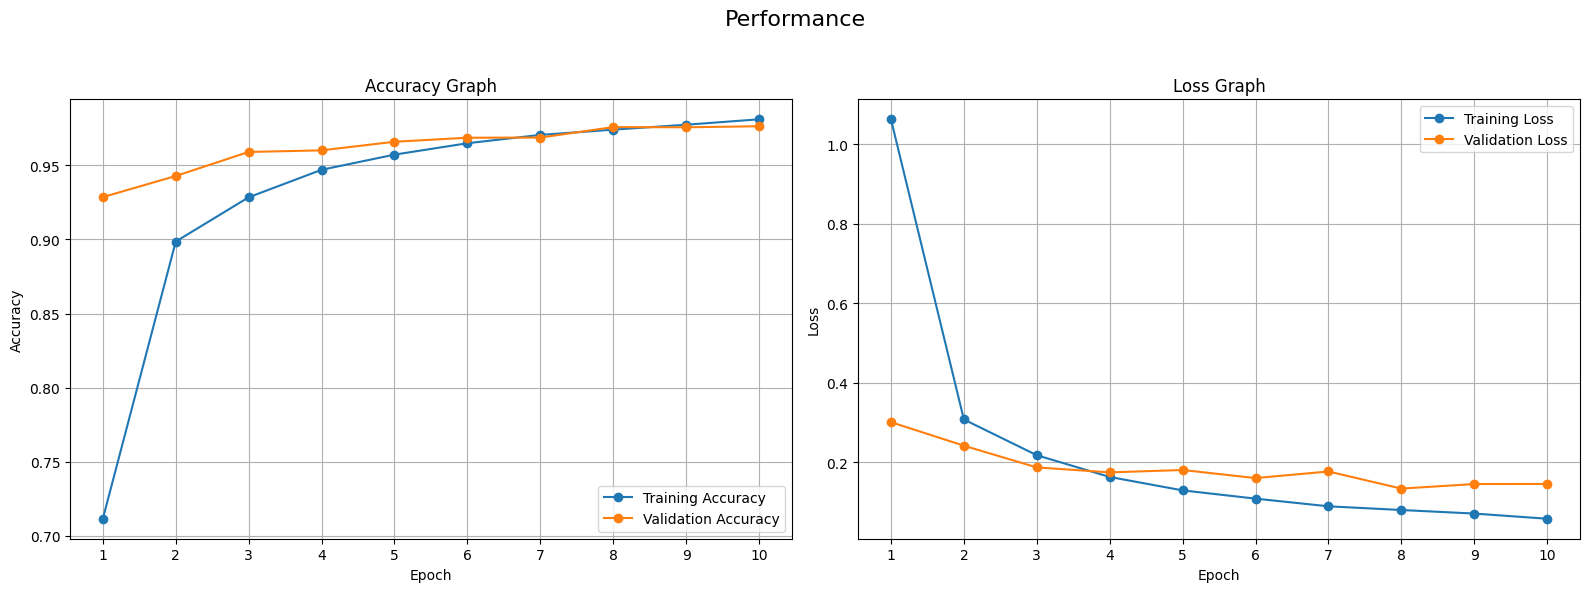

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_labels=[]
for i in range(n):
    epochs_labels.append(i+1)

#Accuracy Graph
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.xticks(ticks=range(n),labels=epochs_labels)
plt.plot(range(n),acc,'o-',label='Training Accuracy')
plt.plot(range(n),val_acc,'o-',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

#Loss Graph
plt.subplot(1,2,2)
plt.xticks(ticks=range(n),labels=epochs_labels)
plt.plot(range(n),loss,'o-',label='Training Loss')
plt.plot(range(n),val_loss,'o-',label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.suptitle('Performance',fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()




### 3.2 Classification Report & Confusion Matrix:

In [ ]:
from sklearn.metrics import classification_report

ytrue=[]
ypred=[]

for image_batch,label_batch in test_dataset:
    ytrue.extend(np.argmax(label_batch,axis=1))
    preds=model.predict(image_batch,verbose=0)
    ypred.extend(np.argmax(preds,axis=1))

print("\nFinal Report:")
print(classification_report(ytrue,ypred,target_names=test_dataset.class_names))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytrue,ypred,normalize='true')
plt.figure(figsize=(14,12))
sns.heatmap(cm,annot=False,cmap='Blues')

plt.title("Normalized Confusion Matrix",fontsize=16)
plt.ylabel("True Label",fontsize=12)
plt.xlabel("Predicted Label",fontsize=12)

spacing=10  #show 1/10 classes every time
positions=[] #numeric position of the labels
labels=[]  # name of classes

for i,class_name in enumerate(class_names):
    if i%spacing==0:
        positions.append(i)
        labels.append(class_name)

plt.xticks(positions,labels,rotation=90)
plt.yticks(positions,labels)
plt.tight_layout()
plt.show()

### 3.3 Random Test:

In [ ]:
import random
def predict_image(image_path):
    image=tf.keras.utils.load_img(image_path, target_size=(100, 100))
    image_array=tf.keras.utils.img_to_array(image)
    image_batch=np.expand_dims(image_array, axis=0)
    scores=model.predict(image_batch, verbose=0)
    best_guess_index=np.argmax(scores[0])
    predicted_label=class_names[best_guess_index]
    confidence=100*np.max(scores[0])
    return predicted_label,confidence

folder="data/Test"
class_names=sorted(os.listdir(folder))
mistakes=[]
correct_guesses=0

for actual_label in class_names:
    image_folder=os.path.join(folder,actual_label)
    random_image_file=random.choice(os.listdir(image_folder))
    path_to_image=os.path.join(image_folder,random_image_file)
    
    predicted_label,confidence=predict_image(path_to_image)
    
    if predicted_label==actual_label:
        correct_guesses+=1
    else:
        mistakes.append({
            "path":path_to_image,
            "actual":actual_label,
            "guess":predicted_label,
            "confidence":confidence
        })

total_images=len(class_names)
accuracy=(correct_guesses/total_images)*100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Correct Guesses: {correct_guesses}/{total_images}")
print(f"Mistakes: {len(mistakes)}")

if mistakes:
    num_mistakes=len(mistakes)
    num_cols=4
    num_rows=(num_mistakes+num_cols-1)//num_cols
    
    plt.figure(figsize=(16,4*num_rows))
    
    for i,mistake in enumerate(mistakes):
        plt.subplot(num_rows, num_cols, i+1)
        
        image=tf.keras.utils.load_img(mistake["path"])
        plt.imshow(image)
        plt.axis('off')
        
        plt.title(
            f"Actual: {mistake['actual']}\n"
            f"Guessed: {mistake['guess']} ({mistake['confidence']:.1f}%)",
            color='red'
        )
        
    plt.tight_layout()
    plt.show()
else: 
    print("\nThe model made no mistakes in this test")

### 4 Iperparameter & Model Comparison:

### 4.1 Learning Rate:

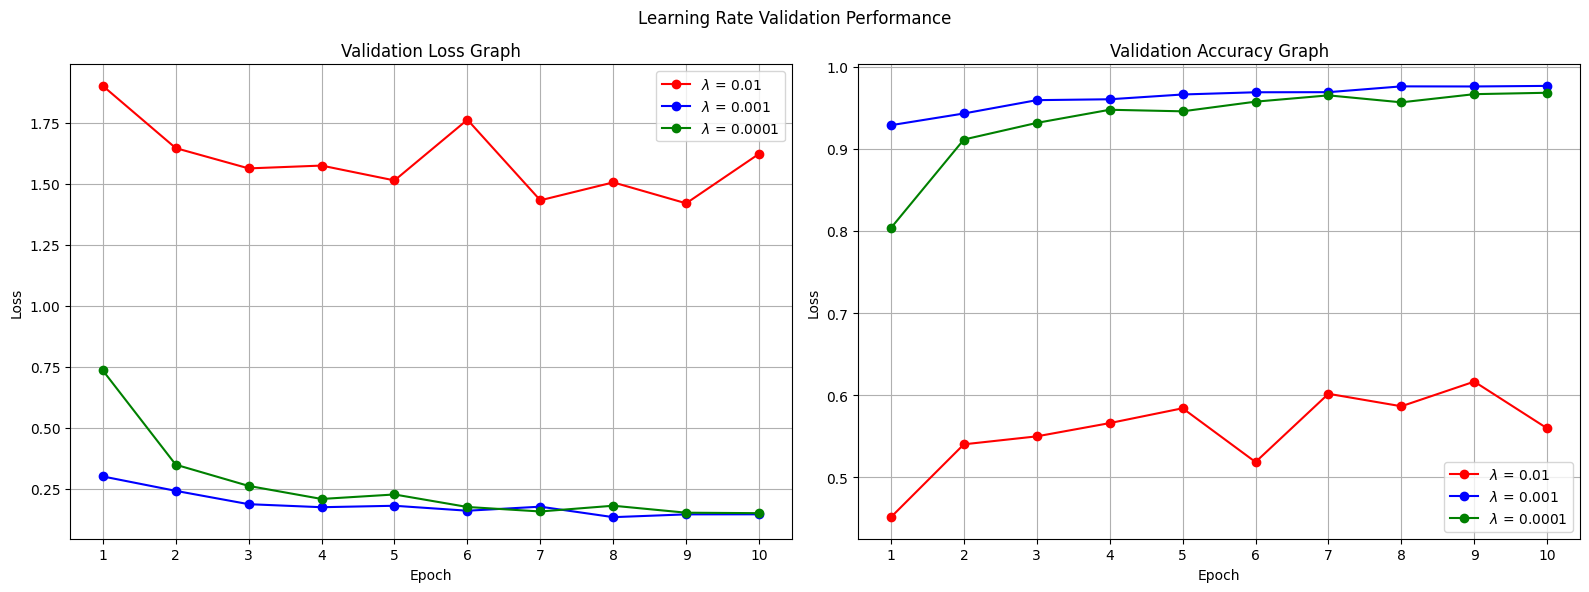

In [ ]:
datahigh=np.loadtxt("lr_high.dat")
datalow=np.loadtxt("lr_low.dat")
loss_low=datalow[:,2]
loss_high=datahigh[:,2]
acc_low=datalow[:,3]
acc_high=datahigh[:,3]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Validation Loss Graph')
plt.xticks(ticks=range(1,n+1)) 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1,n+1),loss_high,"o-",label="$\lambda$ = 0.01",color="red")
plt.plot(range(1,n+1),val_loss,"o-",label="$\lambda$ = 0.001",color="blue")
plt.plot(range(1,n+1),loss_low,"o-",label="$\lambda$ = 0.0001",color="green")
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title("Validation Accuracy Graph")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(ticks=range(1,n+1)) 
plt.plot(range(1,n+1),acc_high,"o-",label="$\lambda$ = 0.01",color="red")
plt.plot(range(1,n+1),val_acc,"o-",label="$\lambda$ = 0.001",color="blue")
plt.plot(range(1,n+1),acc_low,"o-",label="$\lambda$ = 0.0001",color="green")
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout(rect=[0,0,1,0.95])
plt.suptitle("Learning Rate Validation Performance")


plt.show()

### 4.2 Dropout:

Text(0.5, 0.98, 'DropOut Validation Performance')

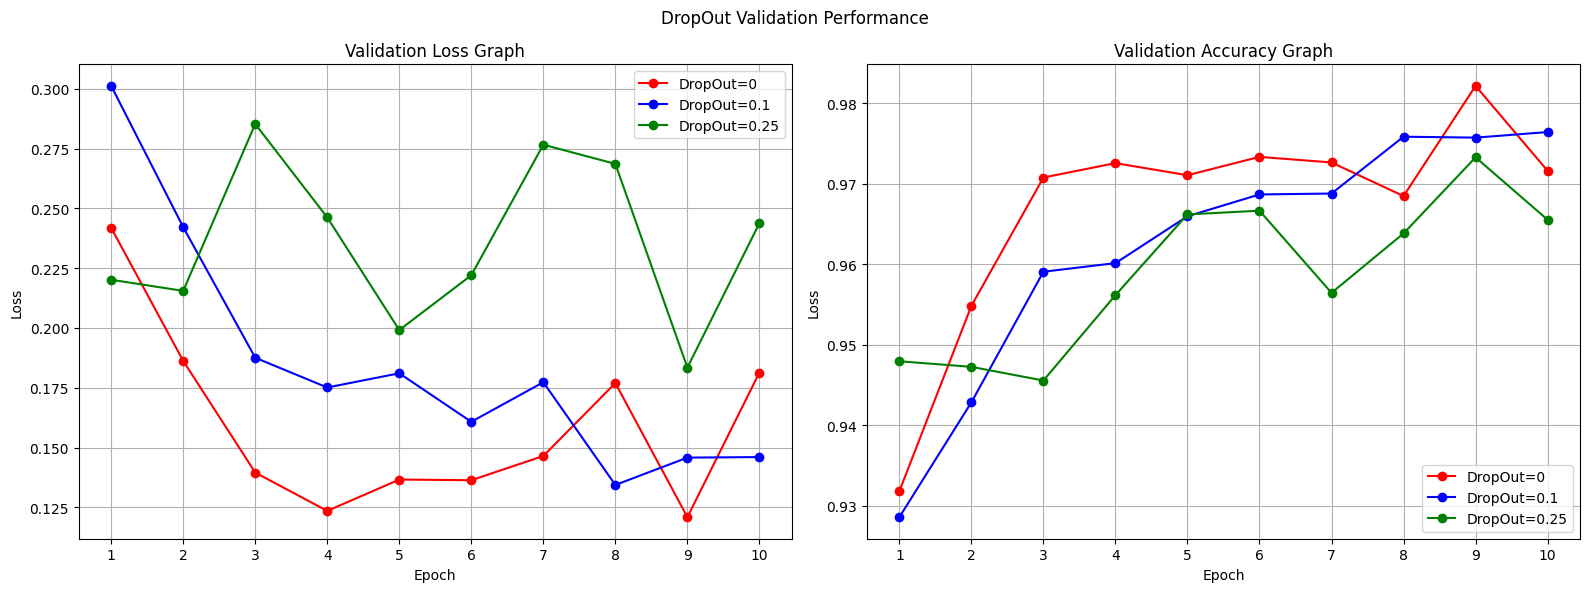

In [ ]:
highdrop=np.loadtxt("drop025.dat")
lowdrop=np.loadtxt("drop0.dat")
loss_low=lowdrop[:,2]
loss_high=highdrop[:,2]
acc_low=lowdrop[:,3]
acc_high=highdrop[:,3]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Validation Loss Graph')
plt.xticks(ticks=range(1,n+1)) 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1,n+1),loss_high,"o-",label="DropOut=0",color="red")
plt.plot(range(1,n+1),val_loss,"o-",label="DropOut=0.1",color="blue")
plt.plot(range(1,n+1),loss_low,"o-",label="DropOut=0.25",color="green")
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title("Validation Accuracy Graph")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(ticks=range(1,n+1)) 
plt.plot(range(1,n+1),acc_high,"o-",label="DropOut=0",color="red")
plt.plot(range(1,n+1),val_acc,"o-",label="DropOut=0.1",color="blue")
plt.plot(range(1,n+1),acc_low,"o-",label="DropOut=0.25",color="green")
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout(rect=[0,0,1,0.95])
plt.suptitle("DropOut Validation Performance")

### 4.3 Comparison between Real CNN

I dati per i modelli SC-3 e ResNet-50 sono tratti da Liu 2023[].

| Caratteristica              | **Mio Modello (Proposto)** | **SC-3 (Liu, 2023)** | **ResNet-50 (Liu, 2023)** |
| :-------------------------- | :------------------------- | :------------------- | :------------------------ |
| **Tipo di Modello**         | CNN Custom ("Light")       | CNN Custom ("Simple")| Transfer Learning         |
| **Numero di Classi**        |   206                      | 131                  | 131                       |
| **Parametri Addestrabili**  |   626862                   | 3.3 Milioni          | 25.6 Milioni              |
| **Accuratezza Finale**      |   97.64%                   | 97.81%               | 98.85%                    |
| **Epoche di Training**      |   10                       | 14                   | 10                        |
| **Tempo Medio per Epoca**   |   5.30 min                 | ~2.43 min            | ~2.80 min                 |
| **Tempo Totale di Training**|   55 min                   | ~34 min              | ~28 min                   |

## References:

[1] H. Mureșan and M. Oltean, "Fruit recognition from images using deep learning", Acta Universitatis Sapientiae, Informatica, 10(1), pp. 26-42, 2018.https://www.kaggle.com/datasets/moltean/fruits.

[2] Chollet, F., et al. (2015). Keras. Software available from keras.io.

[3] Abadi, M., et al. (2015). TensorFlow: Large-Scale Machine Learning on Heterogeneous Distributed Systems. Software available from tensorflow.org.

[4]Liu, K. (2023). Comparison of different Convolutional Neural Network models on Fruit 360 Dataset. *Highlights in Science, Engineering and Technology*, 34, 85-94.